In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.drop(columns=['id','Residence_type'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df = df[df['gender'] != 'Other']

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [ ]:
# Define a threshold for outlier detection
bmi_threshold = 50

# Filter out records with 'bmi' values beyond the threshold
df = df[df['bmi'] <= bmi_threshold]


"# Define a threshold for outlier detection \nbmi_threshold = 50\n\n# Filter out records with 'bmi' values beyond the threshold\ndf = df[df['bmi'] <= bmi_threshold]\n"

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the DataFrame into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Calculate the median of the 'bmi' column in the training set
train_median_bmi = train_df['bmi'].median()

# Fill missing values in the training set
train_df['bmi'].fillna(train_median_bmi, inplace=True)

# Fill missing values in the test set using the median from the training set
test_df['bmi'].fillna(train_median_bmi, inplace=True)


In [ ]:
train_df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
802,Male,79.0,0,0,Yes,Self-employed,112.64,28.5,formerly smoked,0
3927,Female,62.0,0,0,Yes,Private,88.32,36.3,Unknown,0
2337,Female,21.0,0,0,No,Private,59.52,33.7,never smoked,0
3910,Male,31.0,0,0,Yes,Govt_job,65.70,30.4,formerly smoked,0
1886,Female,31.0,0,0,No,Private,59.63,19.9,never smoked,0
1018,Female,63.0,0,0,Yes,Self-employed,85.60,25.9,Unknown,0
3905,Male,78.0,0,0,Yes,Private,208.85,24.4,formerly smoked,0
1675,Male,58.0,1,0,Yes,Private,200.16,33.1,never smoked,0
517,Female,68.0,0,0,Yes,Self-employed,104.38,40.8,formerly smoked,0
3363,Male,61.0,0,0,Yes,Private,81.25,43.4,smokes,0


In [ ]:
train_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encode_cols = ['smoking_status', 'work_type']
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding for each column in training and test sets
for col in label_encode_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.transform(test_df[col])
# Columns to one-hot encode
onehot_cols = ['gender','ever_married']

# Apply one-hot encoding to training set
train_df_onehot = pd.get_dummies(train_df, columns=onehot_cols)

# Apply one-hot encoding to test set
test_df_onehot = pd.get_dummies(test_df, columns=onehot_cols)

In [ ]:
train_df_onehot.head(11)

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes
802,79.0,0,0,3,112.64,28.5,1,0,0,1,0,1
3927,62.0,0,0,2,88.32,36.3,0,0,1,0,0,1
2337,21.0,0,0,2,59.52,33.7,2,0,1,0,1,0
3910,31.0,0,0,0,65.70,30.4,1,0,0,1,0,1
1886,31.0,0,0,2,59.63,19.9,2,0,1,0,1,0
1018,63.0,0,0,3,85.60,25.9,0,0,1,0,0,1
3905,78.0,0,0,2,208.85,24.4,1,0,0,1,0,1
1675,58.0,1,0,2,200.16,33.1,2,0,0,1,0,1
517,68.0,0,0,3,104.38,40.8,1,0,1,0,0,1
3363,61.0,0,0,2,81.25,43.4,3,0,0,1,0,1


In [ ]:
X_train = train_df_onehot.drop('stroke',axis=1)
y_train = train_df_onehot['stroke']

X_test = test_df_onehot.drop('stroke',axis=1)
y_test = test_df_onehot['stroke']

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameters grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree model
dtree = DecisionTreeClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Score:", best_score)
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Optionally, you can fit the best model on the entire training data
best_model.fit(X_train, y_train)

# Evaluate the best model on the test data
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Best Score: 0.9530218193462276
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
Test Accuracy: 0.9383561643835616


In [ ]:
DT_model=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=4,min_samples_split=2,splitter='random')
DT_model.fit(X_train,y_train)
print(DT_model.score(X_test,y_test))

0.9373776908023483


In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)


In [ ]:
DT_model.fit(X_train_resampled, y_train_resampled)
accuracy = DT_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8189823874755382


In [ ]:
# trying cross validation to increase accuracy
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


# Create a logistic regression model
model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_leaf=4,min_samples_split=2,splitter='random')

# Define the number of folds for k-fold cross-validation
n_splits = 5

# Create the k-fold cross-validation object
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(model,X_train_resampled, y_train_resampled, cv=kfold)

# Train the model on the entire training dataset
model.fit(X_train_resampled, y_train_resampled)
# Print the cross-validation scores
print("Cross-validation scores:", scores)
# Calculate and print the mean accuracy of cross-validation scores
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.92813918 0.93721634 0.93868282 0.9318698  0.93943982]
Mean accuracy: 0.93506959038275


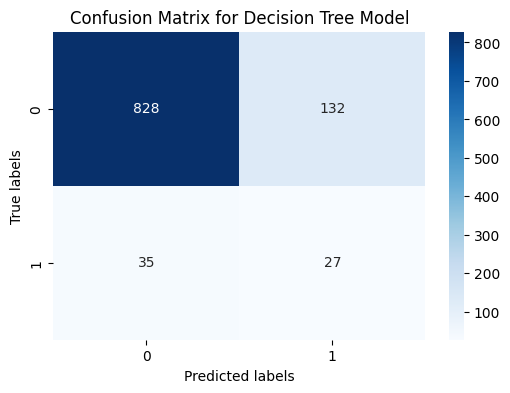

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()
